# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Saia Mazaya Fatin
- **Email:** saiavivymaza@gmail.com
- **ID Dicoding:** Saia Mazaya Fatin

## Menentukan Pertanyaan Bisnis

- Bagaimana tren bulanan konsentrasi PM2.5 di Stasiun Aotizhongxin dari tahun 2013 hingga 2017?
- Bagaimana distribusi harian PM2.5 sepanjang hari? Apakah ada jam-jam tertentu dengan konsentrasi PM2.5 yang lebih tinggi?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [4]:
df = pd.read_csv('dataset/PRSA_Data_aotizhongxin_20130301-20170228.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [7]:
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


**Insight:**
- Total Baris ada 35064 dan Total Kolom ada 18
- Setelah dilihat dari .info() ternyata ada beberapa kolom yang memiliki NAN

### Assessing Data

In [8]:

    # Menghitung jumlah missing values di setiap kolom
    missing_values_count = df.isnull().sum()
    
    # Menghitung total baris dalam dataframe
    total_rows = df.shape[0]
    
    # Menghitung persentase missing values di setiap kolom
    missing_values_percentage = (missing_values_count / total_rows) * 100
    
    # Membuat dataframe untuk menampilkan jumlah dan persentase missing values
    missing_values_df = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': missing_values_count,
        'Percentage': missing_values_percentage
    })
    
    # Menampilkan dataframe missing_values_df
    missing_values_df

,Column,Missing Values,Percentage
No,No,0,0.000000
year,year,0,0.000000
month,month,0,0.000000
day,day,0,0.000000
hour,hour,0,0.000000
PM2.5,PM2.5,925,2.638033
PM10,PM10,718,2.047684
SO2,SO2,935,2.666553
NO2,NO2,1023,2.917522
CO,CO,1776,5.065024


In [9]:
missing_values_df

,Column,Missing Values,Percentage
No,No,0,0.000000
year,year,0,0.000000
month,month,0,0.000000
day,day,0,0.000000
hour,hour,0,0.000000
PM2.5,PM2.5,925,2.638033
PM10,PM10,718,2.047684
SO2,SO2,935,2.666553
NO2,NO2,1023,2.917522
CO,CO,1776,5.065024


**Insight:**
- Ditemukan Missing Values pada beberapa kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM
- Secara persentase, missing values masih terbilang rendah karena masih di bawah 10%

In [10]:
print('Duplikat data: ',df.duplicated().sum())

Duplikat data:  0


**Insight:**
- Tidak ditemukan Duplikat Values pada dataset

In [11]:
# Inisialisasi dictionary untuk menyimpan persentase outlier di setiap kolom
outlier_percentages = {}

# Loop melalui setiap kolom numerik dalam dataframe
for col in df.select_dtypes(include='number').columns:
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Menghitung rentang antar kuartil (IQR)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan batas atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menemukan data yang berada di luar batas bawah dan batas atas (outliers)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # Menghitung persentase outlier dalam kolom
    outlier_percentage = (len(outliers) / len(df)) * 100

    # Menyimpan persentase outlier dalam dictionary
    outlier_percentages[col] = outlier_percentage

# Membuat dataframe dari dictionary outlier_percentages
outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage'])
# Mengurutkan dataframe berdasarkan persentase outlier secara descending
outlier_df = outlier_df.sort_values(by='Outlier Percentage', ascending=False)

In [12]:
outlier_df

,Outlier Percentage
SO2,8.709788
CO,7.434976
WSPM,4.968058
PM2.5,4.631531
RAIN,3.935661
O3,3.736026
PM10,3.080082
NO2,1.346110
hour,0.000000
year,0.000000


**Insight:**
- Ditemukan Outlier pada beberapa kolom SO2, CO, WSPM, PM2.5, RAIN, O3, PM10, dan NO2
- Secara persentase, outlier masih terbilang rendah karena masih di bawah 10%

### Cleaning Data

In [13]:
df_cleaned = df.copy()

In [14]:
# Ambil kolom yang akan dihapus outlier-nya
columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'RAIN', 'WSPM']

In [15]:
# Loop melalui setiap kolom yang akan dihapus outlier-nya
for col in columns:
    # Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    # Menghitung rentang antar kuartil (IQR)
    IQR = Q3 - Q1
    # Menghitung batas bawah dan batas atas untuk mendeteksi outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Menghapus data yang berada di luar batas bawah dan batas atas (outliers)
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

In [16]:
outlier_percentages = {}

for col in df_cleaned.select_dtypes(include='number').columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df_cleaned)) * 100
        
    outlier_percentages[col] = outlier_percentage
    
outlier_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage'])
outlier_df = outlier_df.sort_values(by='Outlier Percentage', ascending=False)

In [17]:
outlier_df

,Outlier Percentage
SO2,5.684154
PM2.5,2.748235
PM10,1.237823
O3,1.219948
WSPM,1.050139
CO,0.750737
NO2,0.420055
No,0.000000
hour,0.000000
year,0.000000


**Insight:**
- Setelah menghapus Outlier menggunakan IQR, outlier jadi berkurang

In [18]:
df_cleaned = df_cleaned.dropna()

In [19]:
print("Cek kolom setelah menghapus missing values:")
df_cleaned.isnull().sum()

Cek kolom setelah menghapus missing values:


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- Dikarenakan persentase missing values sangat sedikit, jadi lebih memilih menghapus datanya

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [20]:
# Ambil nama kolom kategorikal dan numerikal
cat = df_cleaned.select_dtypes(include='object').columns
num = df_cleaned.select_dtypes(include='number').columns

In [21]:
df_cleaned[cat].describe()

,wd,station
count,22334,22334
unique,16,1
top,NE,Aotizhongxin
freq,3088,22334


In [22]:
df_cleaned[num].describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.000000,22334.0,22334.000000
mean,17940.447211,2014.711650,6.491135,15.806752,11.404227,55.604164,79.445254,10.261744,50.664713,814.396302,56.605279,15.219037,1011.271129,3.948173,0.0,1.672172
std,9967.611883,1.166999,3.183951,8.800413,6.959570,47.980356,59.666360,9.653412,28.306133,473.911740,48.260999,10.875085,10.469318,14.084369,0.0,1.034623
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.300000,985.900000,-34.300000,0.0,0.000000
25%,9975.250000,2014.000000,4.000000,8.000000,6.000000,17.000000,30.000000,3.000000,28.000000,400.000000,15.000000,6.100000,1002.700000,-8.200000,0.0,0.900000
50%,18170.500000,2015.000000,7.000000,16.000000,11.000000,41.000000,66.000000,7.000000,47.000000,700.000000,48.000000,17.100000,1010.100000,6.300000,0.0,1.500000
75%,26953.750000,2016.000000,9.000000,23.000000,18.000000,81.000000,115.000000,14.000000,69.000000,1100.000000,84.000000,24.100000,1019.600000,16.400000,0.0,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,252.000000,303.000000,45.410400,138.000000,2200.000000,199.000000,40.100000,1042.000000,28.500000,0.0,4.500000


In [23]:
df_cleaned[num].info()

<class 'pandas.core.frame.DataFrame'>
Index: 22334 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      22334 non-null  int64  
 1   year    22334 non-null  int64  
 2   month   22334 non-null  int64  
 3   day     22334 non-null  int64  
 4   hour    22334 non-null  int64  
 5   PM2.5   22334 non-null  float64
 6   PM10    22334 non-null  float64
 7   SO2     22334 non-null  float64
 8   NO2     22334 non-null  float64
 9   CO      22334 non-null  float64
 10  O3      22334 non-null  float64
 11  TEMP    22334 non-null  float64
 12  PRES    22334 non-null  float64
 13  DEWP    22334 non-null  float64
 14  RAIN    22334 non-null  float64
 15  WSPM    22334 non-null  float64
dtypes: float64(11), int64(5)
memory usage: 2.9 MB


**Insight:**
- xxx
- xxx

### Univariate Analysis

In [24]:
def eda_univariate_numeric(df):
    # Mendapatkan kolom numerik dari dataframe
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_columns = len(numeric_columns)
    
    # Menentukan jumlah kolom per baris dan jumlah baris yang dibutuhkan
    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    # Mengatur ukuran figure untuk plot
    plt.figure(figsize=(16, 6 * num_rows))

    # Loop melalui setiap kolom numerik untuk membuat histogram
    for idx, col in enumerate(numeric_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()

def eda_univariate_categorical(df):
    # Mendapatkan kolom kategorikal dari dataframe
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    num_columns = len(categorical_columns)

    # Menentukan jumlah kolom per baris dan jumlah baris yang dibutuhkan
    cols_per_row = 4
    num_rows = (num_columns + cols_per_row - 1) // cols_per_row

    # Mengatur ukuran figure untuk plot
    plt.figure(figsize=(16, 6 * num_rows))

    # Loop melalui setiap kolom kategorikal untuk membuat countplot
    for idx, col in enumerate(categorical_columns):
        plt.subplot(num_rows, cols_per_row, idx + 1)
        sns.countplot(x=df[col], order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Countplot of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')

    # Mengatur layout agar tidak tumpang tindih
    plt.tight_layout()
    plt.show()


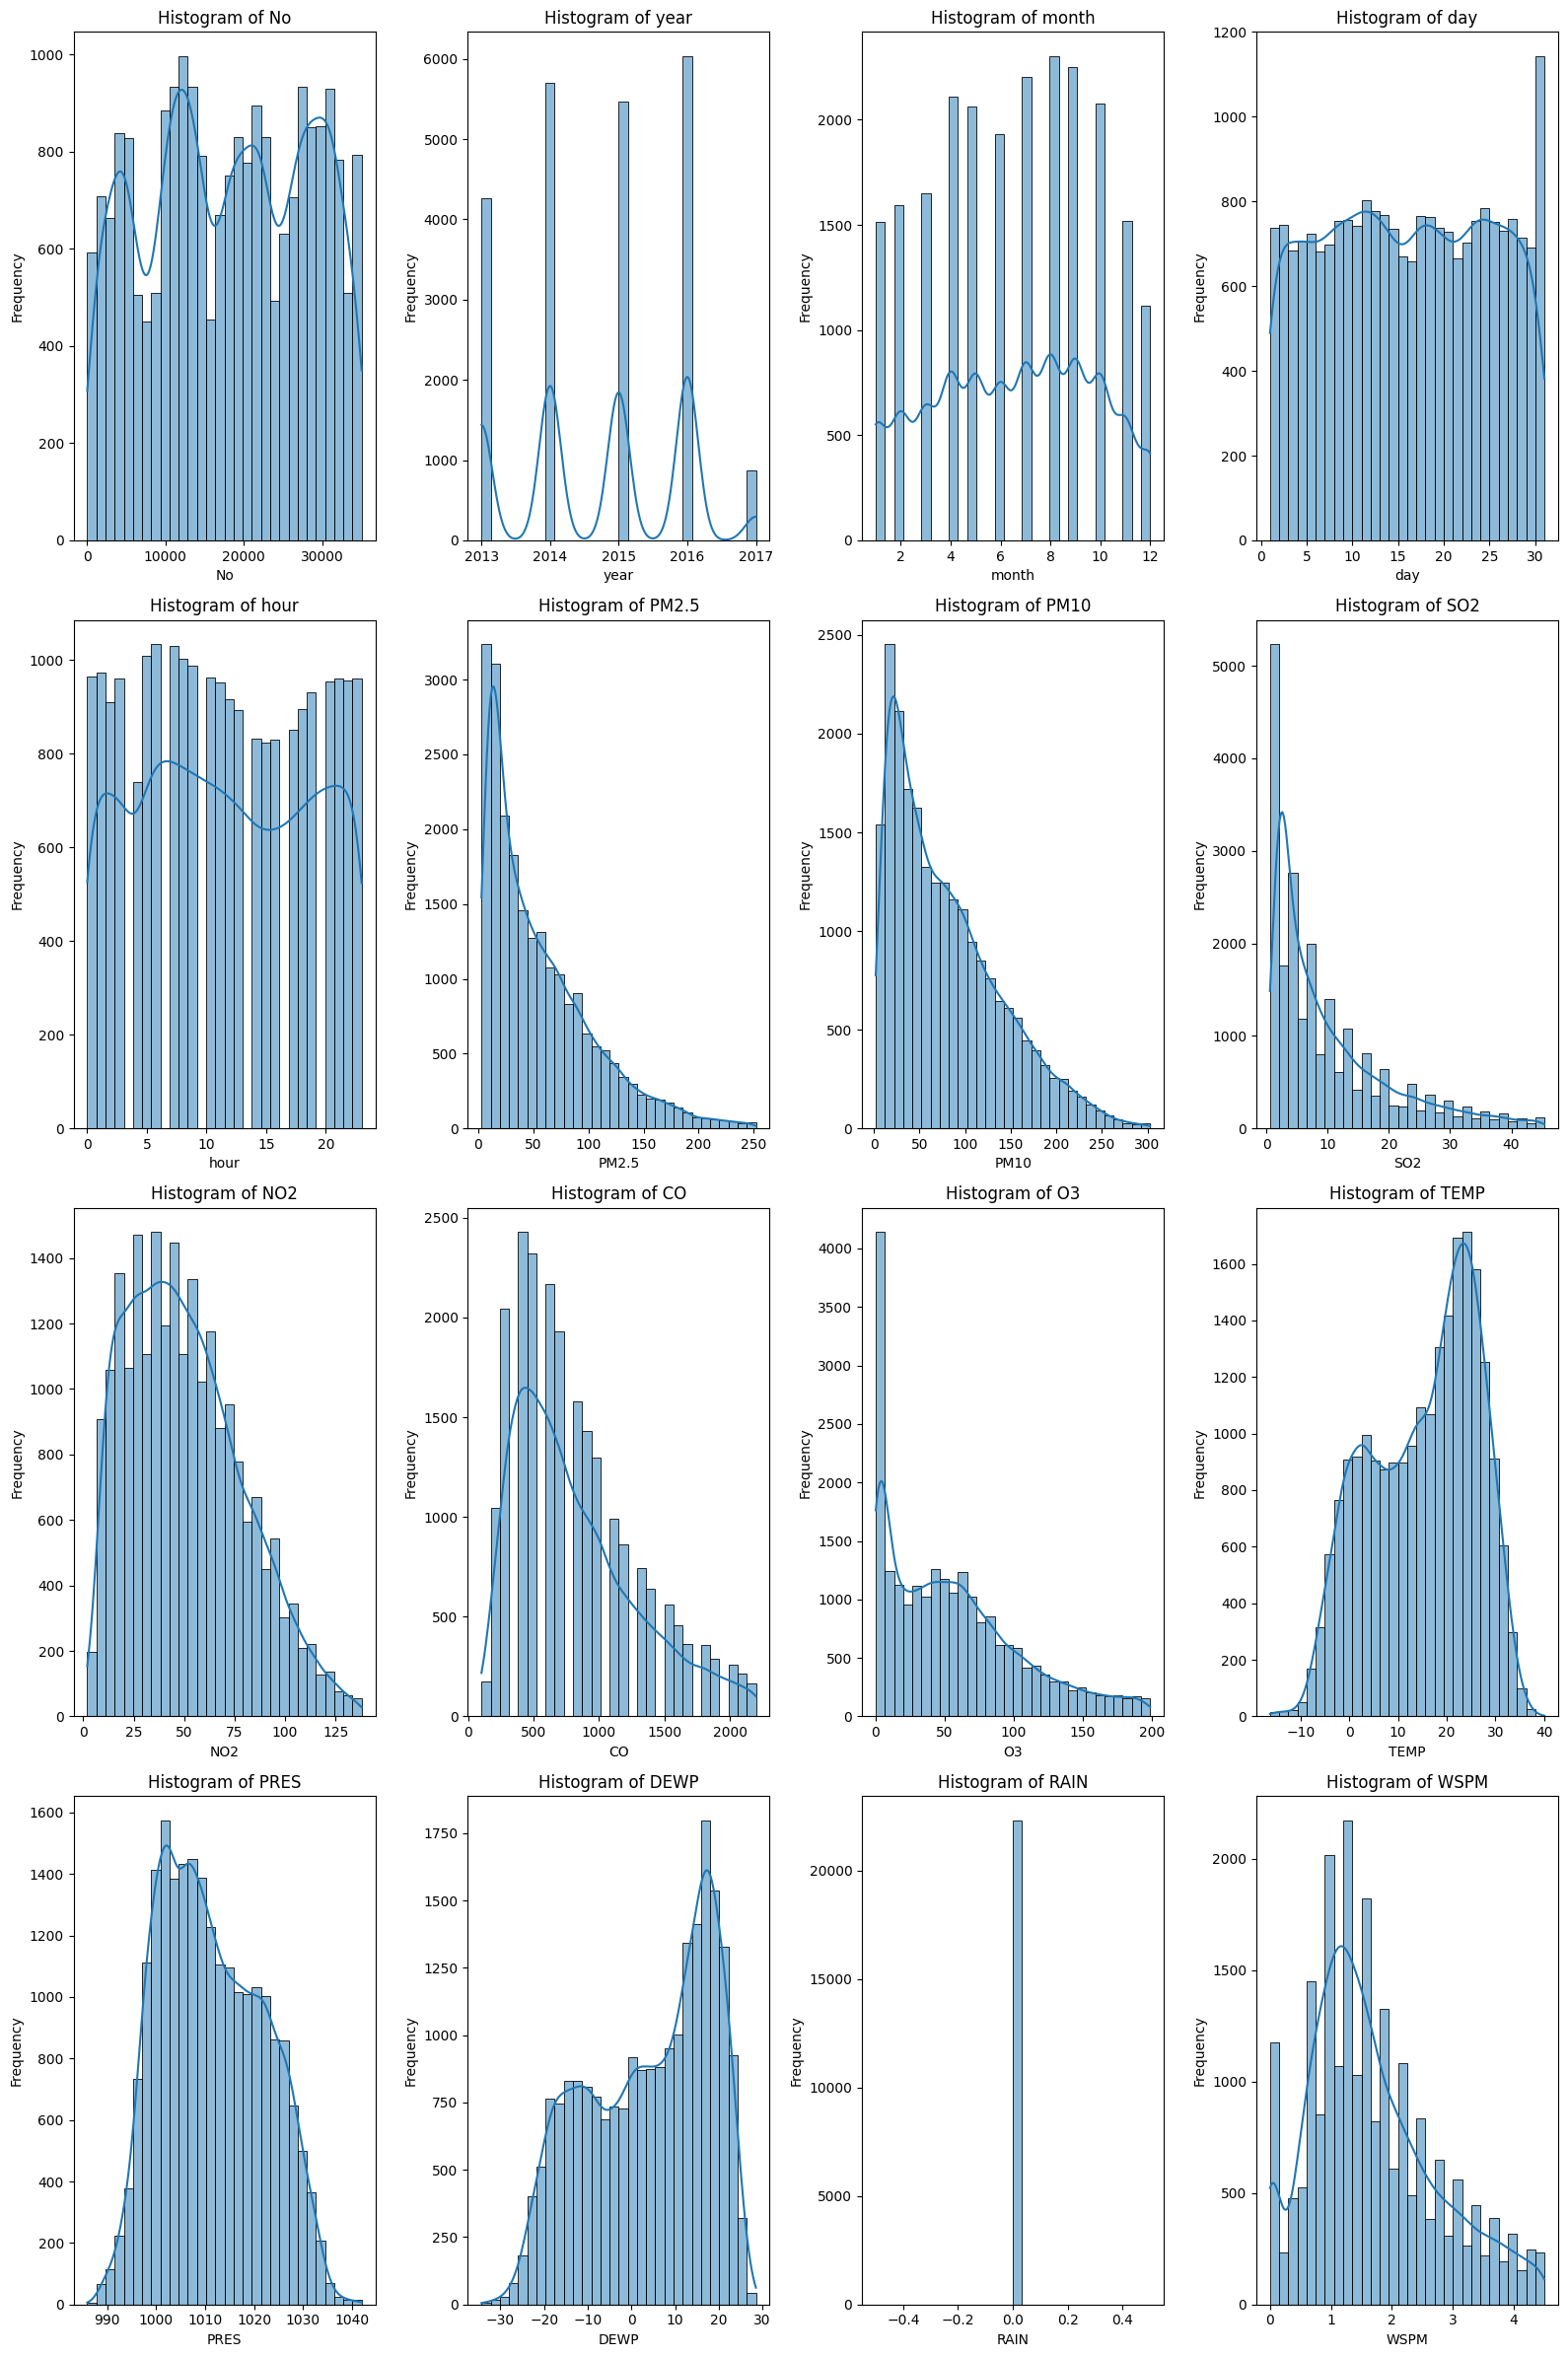

In [25]:
eda_univariate_numeric(df_cleaned)

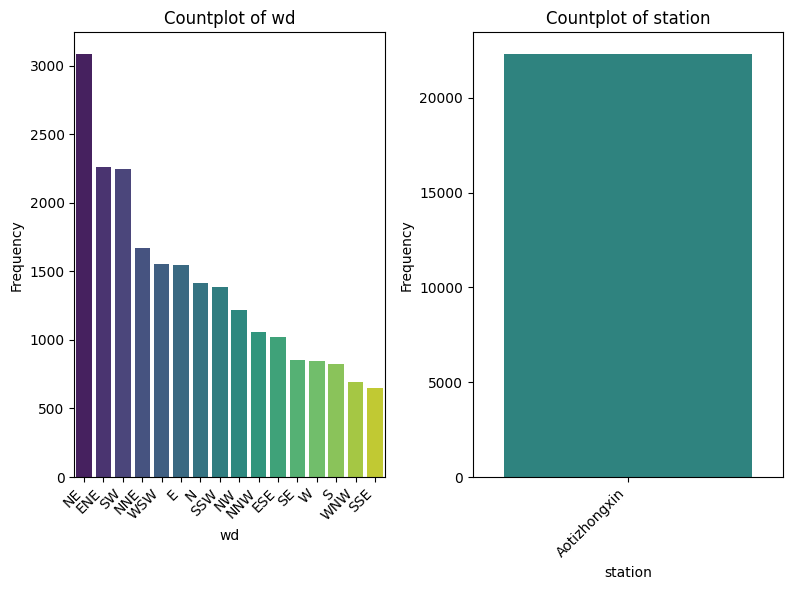

In [26]:
eda_univariate_categorical(df_cleaned)

In [27]:
def count_values_per_column(df, categorical_columns):
    # Loop melalui setiap kolom kategorikal dalam dataframe
    for col in categorical_columns:
        # Menampilkan nama kolom yang sedang dihitung
        print(f"Count of values in '{col}':")
        # Menampilkan jumlah nilai unik dalam kolom tersebut
        print(df[col].value_counts())
        # Menambahkan pemisah untuk kejelasan tampilan
        print("\n" + "="*50 + "\n")

In [28]:
count_values_per_column(df_cleaned, cat)

Count of values in 'wd':
wd
NE     3088
ENE    2264
SW     2246
NNE    1671
WSW    1550
E      1548
N      1414
SSW    1386
NW     1217
NNW    1058
ESE    1023
SE      856
W       849
S       821
WNW     691
SSE     652
Name: count, dtype: int64


Count of values in 'station':
station
Aotizhongxin    22334
Name: count, dtype: int64




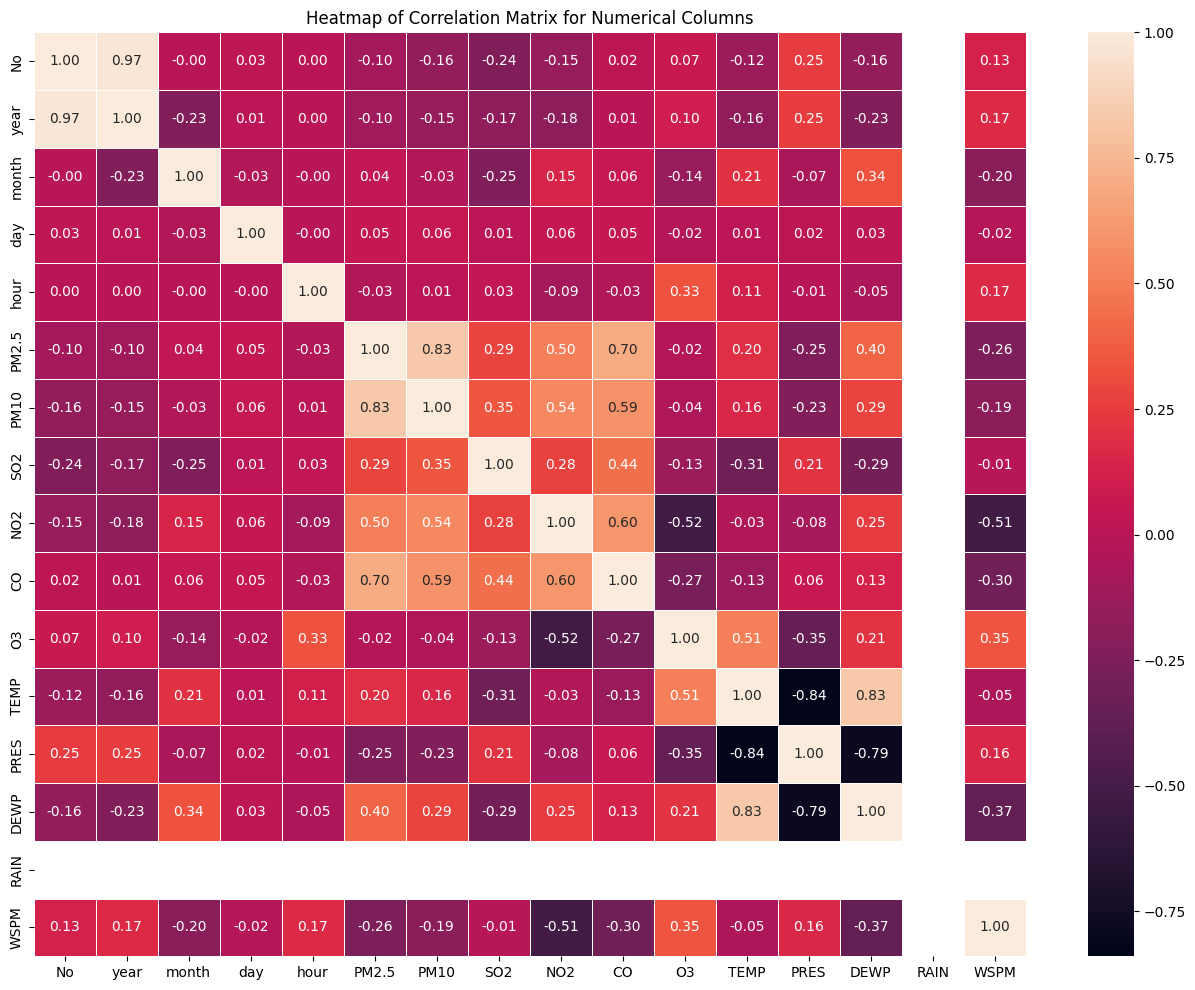

In [29]:
corr_matrix = df_cleaned[num].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix for Numerical Columns')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

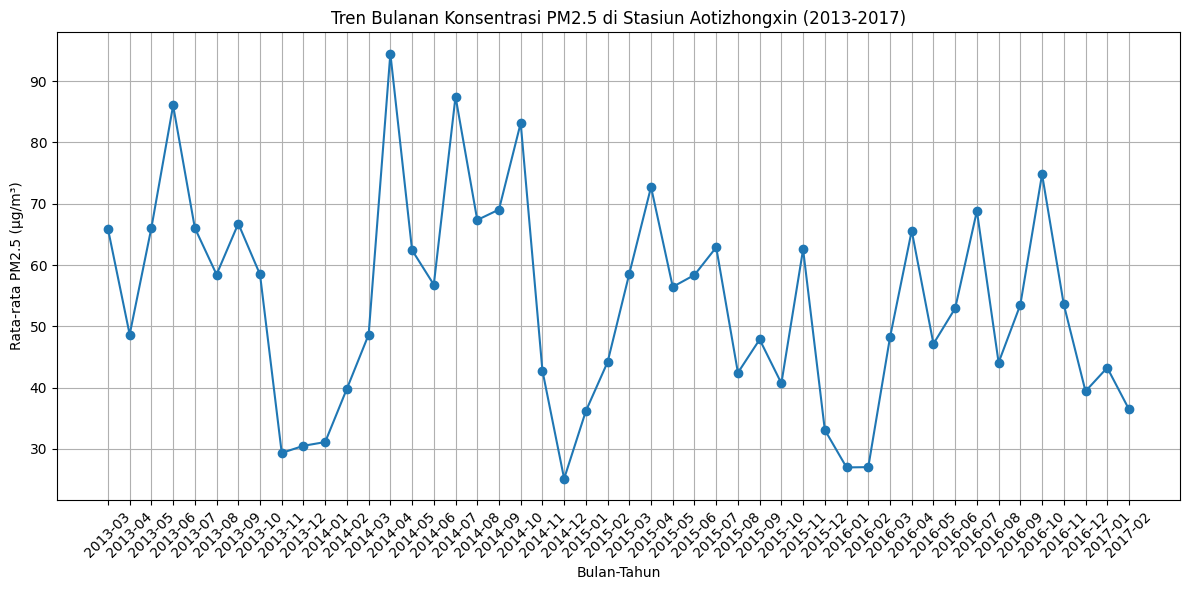

In [30]:
# Mengubah kolom 'year', 'month', 'day' menjadi datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned[['year', 'month', 'day']])

# Menghitung rata-rata PM2.5 per bulan
df_cleaned_monthly = df_cleaned.groupby(['year', 'month'])['PM2.5'].mean().reset_index()

# Membuat kolom 'year_month' untuk visualisasi
df_cleaned_monthly['year_month'] = df_cleaned_monthly['year'].astype(str) + '-' + df_cleaned_monthly['month'].astype(str).str.zfill(2)

# Plot tren bulanan PM2.5
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned_monthly['year_month'], df_cleaned_monthly['PM2.5'], marker='o', linestyle='-')
plt.title('Tren Bulanan Konsentrasi PM2.5 di Stasiun Aotizhongxin (2013-2017)')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rata-rata PM2.5 (µg/m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

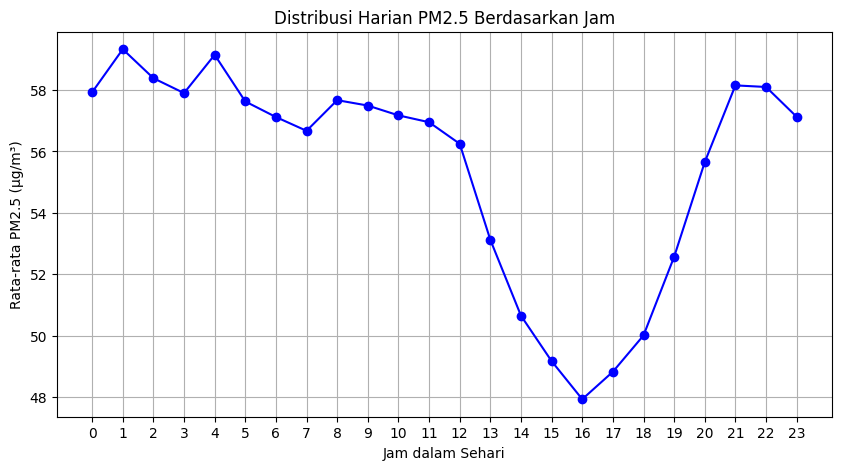

In [31]:
# Menghitung rata-rata PM2.5 untuk setiap jam dalam sehari
hourly_avg = df_cleaned.groupby('hour')['PM2.5'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linestyle='-', color='b')
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata PM2.5 (µg/m³)")
plt.title("Distribusi Harian PM2.5 Berdasarkan Jam")
plt.grid(True)
plt.show()

**Insight:**
- Pertanyaan 1: 
1. PM2.5 menunjukkan pola musiman yang jelas dengan puncak konsentrasi terjadi pada musim dingin (November – Januari) dan penurunan pada musim panas (Juni – Agustus).
Ini kemungkinan disebabkan oleh penggunaan pemanas berbahan bakar batu bara di musim dingin dan kondisi atmosfer yang lebih stabil, yang menyebabkan akumulasi polutan.
Sebaliknya, musim panas memiliki lebih banyak curah hujan dan angin yang membantu menyebarkan polutan.
2. Tren tahunan menunjukkan fluktuasi yang konsisten dengan lonjakan tinggi pada beberapa tahun, seperti awal 2014 dan akhir 2016.
Ini bisa disebabkan oleh faktor eksternal seperti perubahan kebijakan lingkungan, kondisi cuaca tertentu, atau peningkatan aktivitas industri dan kendaraan.
3. Penurunan PM2.5 yang tajam di beberapa bulan (misalnya akhir 2013 dan akhir 2015) mungkin berkaitan dengan kebijakan pengendalian polusi udara atau kondisi cuaca yang membantu membersihkan udara.
- Pertanyaan 2: 
1. Konsentrasi PM2.5 cenderung tinggi pada malam hingga dini hari (00:00 - 06:00).
Ini mungkin disebabkan oleh akumulasi polusi saat atmosfer lebih stabil, dengan sedikit angin untuk menyebarkan polutan.
2. Setelah jam 06:00, konsentrasi PM2.5 mulai menurun secara bertahap hingga mencapai titik terendah sekitar pukul 15:00 - 16:00.
Penyebabnya kemungkinan adalah peningkatan suhu dan aktivitas atmosfer di siang hari, yang membantu menyebarkan polutan.
3. Setelah pukul 16:00, konsentrasi PM2.5 mulai meningkat lagi dan mencapai puncak di sekitar pukul 21:00 - 22:00.
Ini bisa disebabkan oleh peningkatan aktivitas manusia, seperti lalu lintas sore dan penggunaan pemanas atau sumber polusi lainnya di malam hari.

## Analisis Lanjutan (Clustering dengan Teknik Binning)

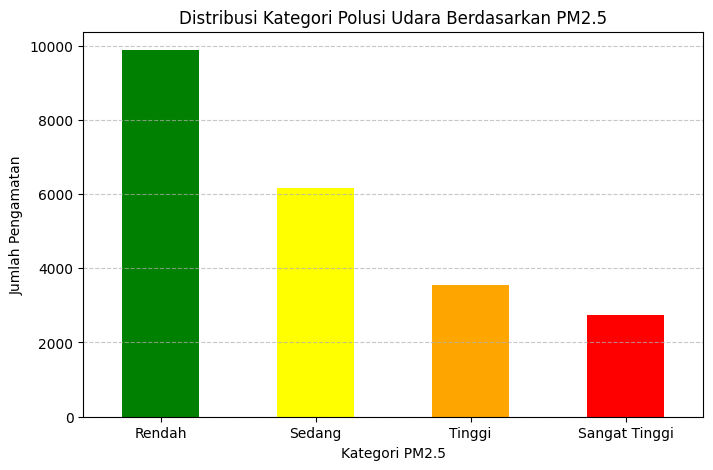

In [32]:
bins = [0, 35, 75, 115, float('inf')]  # Rentang nilai PM2.5
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

# Buat kolom kategori berdasarkan binning
df_cleaned['Kategori_PM2.5'] = pd.cut(df_cleaned['PM2.5'], bins=bins, labels=labels, right=False)

# Hitung jumlah data di setiap kategori
category_counts = df_cleaned['Kategori_PM2.5'].value_counts().sort_index()

# Visualisasi Histogram Kategori PM2.5
plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.xlabel("Kategori PM2.5")
plt.ylabel("Jumlah Pengamatan")
plt.title("Distribusi Kategori Polusi Udara Berdasarkan PM2.5")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Clustering dengan Teknik Binning 
1. Kategori "Rendah" (PM2.5 < 35 µg/m³) memiliki jumlah pengamatan tertinggi
    Ini menunjukkan bahwa sebagian besar waktu, kualitas udara di stasiun Aotizhongxin berada pada tingkat yang cukup baik.
2. Kategori "Sedang" (35 ≤ PM2.5 < 75 µg/m³) merupakan kategori terbesar kedua
    Artinya, meskipun udara sering bersih, ada banyak hari dengan tingkat polusi sedang yang mungkin masih berdampak pada kesehatan kelompok rentan.
3. Kategori "Tinggi" dan "Sangat Tinggi" memiliki jumlah pengamatan yang lebih rendah
    Ini berarti tingkat polusi ekstrem tidak terjadi terlalu sering, tetapi tetap cukup signifikan untuk diperhatikan.
4. Ketika PM2.5 mencapai level "Sangat Tinggi" (≥ 115 µg/m³), ini bisa berbahaya bagi kesehatan, terutama bagi orang dengan penyakit pernapasan.

## Conclusion

- Conclution pertanyaan 1 : Konsentrasi PM2.5 di Stasiun Aotizhongxin menunjukkan pola musiman yang khas, dengan peningkatan signifikan di musim dingin dan penurunan di musim panas. Ini menunjukkan bahwa faktor meteorologi dan aktivitas manusia sangat mempengaruhi tingkat polusi udara di wilayah ini.
- Conclution pertanyaan 2 : Distribusi harian PM2.5 menunjukkan pola U, dengan konsentrasi tinggi di malam dan dini hari, menurun di siang hari, lalu meningkat kembali di malam hari. Ini sesuai dengan pola umum polusi udara yang dipengaruhi oleh kondisi atmosfer dan aktivitas manusia.

In [33]:
df_cleaned.to_csv('dashboard/PRSA_Data_Aotizhongxin_Cleaned.csv', index=False)